Import relevant libraries

In [67]:
import pandas as pd
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter, get_common_distributions
import scipy.stats as stats
from IPython.display import Image

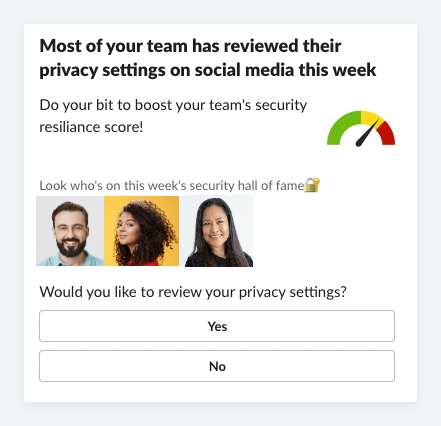

In [68]:
Image(filename="VC.png")

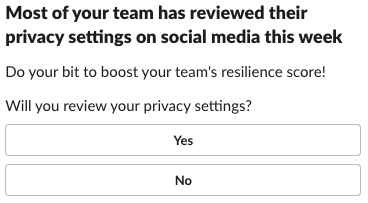

In [69]:
Image(filename="Control.png")

Import data

In [70]:
df= pd.read_csv('./Visual Nudges Survey_25 October 2022_14.20.csv')


Columns header reference 

In [71]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore', 'Consent',
       'S1', 'S2', 'SM Activities_1', 'SM Activities_2', 'SM Activities_3',
       'SM Activities_4', 'SM Privacy', 'PCV1', 'PCV2', 'PCV3', 'PCH1', 'PCH2',
       'PCH3', 'Visual_1_x', 'Visual_1_y', 'Visual_Yes', 'Visual_No',
       'Visual_Other', 'VC Time_First Click', 'VC Time_Last Click',
       'VC Time_Page Submit', 'VC Time_Click Count', 'Rationale No: VC',
       'Rationale No: VC_6_TEXT', 'Pick element_1', 'Pick element_2',
       'Pick element_3', 'Pick element_4', 'Pick element_5', 'Pick element_6',
       'VC-Trust_1', 'VC-Stimulation_1', 'VC-Stimulation_2',
       'VC-Stimulation_3', 'VC-Relevance', 'VC-Rationale',
       'Co

Filtering by response to nudge (both visual & control, between yes and no)

In [72]:
no=df[(df['Visual_No']==1)|(df['Control Condition_No']==1)]
no.loc[:,['PCV1', 'PCV2', 'PCV3', 'PCH1', 'PCH2','PCH3']].head()


,PCV1,PCV2,PCV3,PCH1,PCH2,PCH3
1,A moderate amount,A moderate amount,A moderate amount,A lot,A lot,A little
3,A lot,A great deal,A great deal,A lot,A lot,A lot
4,A lot,A great deal,A lot,A great deal,A lot,A great deal
9,A moderate amount,A lot,A moderate amount,A moderate amount,A lot,A little
19,A great deal,A great deal,A great deal,A great deal,A great deal,A great deal


In [73]:
yes=df[(df['Visual_Yes']==1)|(df['Control Condition_Yes']==1)]
yes.loc[:,['PCV1', 'PCV2', 'PCV3', 'PCH1', 'PCH2','PCH3']].head()


,PCV1,PCV2,PCV3,PCH1,PCH2,PCH3
0,A little,A moderate amount,A little,A lot,A moderate amount,A great deal
2,A lot,A lot,A moderate amount,A great deal,A moderate amount,A lot
5,A lot,A great deal,A lot,A lot,A moderate amount,A great deal
6,None at all,A little,None at all,A moderate amount,A lot,A moderate amount
7,A lot,A great deal,A moderate amount,A great deal,A great deal,A great deal


Setting values for responses

In [74]:
scores={
    'None at all': 0,
    'A little': 0.25,
    'A moderate amount': 0.5,
    'A lot': 0.75,
    'A great deal': 1
    }



Weight assignment function

In [75]:
def counter(col, frame):
    count=0
    for item in col:
        if item in scores:
            count+=scores[item]
    return count/len(frame)

In [76]:
yes_pcv1_mean= counter(yes['PCV1'], yes) 
yes_pcv2_mean=counter(yes['PCV2'], yes)
yes_pcv3_mean=counter(yes['PCV3'], yes)

yes_pcv_total=(yes_pcv1_mean+yes_pcv2_mean+yes_pcv3_mean)/3

In [77]:
yes_pch1_mean= counter(yes['PCH1'],yes) 
yes_pch2_mean=counter(yes['PCH2'],yes)
yes_pch3_mean=counter(yes['PCH3'],yes)

yes_pch_total=(yes_pch1_mean+yes_pch2_mean+yes_pch3_mean)/3

In [78]:
no_pch1_mean= counter(no['PCH1'],no) 
no_pch2_mean=counter(no['PCH2'],no)
no_pch3_mean=counter(no['PCH3'],no)

no_pch_total=(no_pch1_mean+no_pch2_mean+no_pch3_mean)/3

In [79]:
no_pcv1_mean= counter(no['PCV1'],no) 
no_pcv2_mean=counter(no['PCV2'],no)
no_pcv3_mean=counter(no['PCV3'],no)

no_pcv_total=(no_pcv1_mean+no_pcv2_mean+no_pcv3_mean)/3


Generate bar charts out of averages 

<BarContainer object of 6 artists>

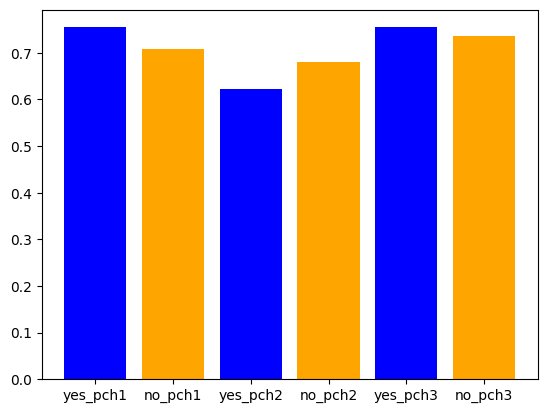

In [80]:
data1=[yes_pch1_mean,no_pch1_mean, yes_pch2_mean, no_pch2_mean, yes_pch3_mean, no_pch3_mean]
plt.xticks(range(len(data1)),['yes_pch1','no_pch1', 'yes_pch2', 'no_pch2', 'yes_pch3', 'no_pch3'])
plt.bar(range(len(data1)), data1, color=['blue', 'orange'])

<BarContainer object of 6 artists>

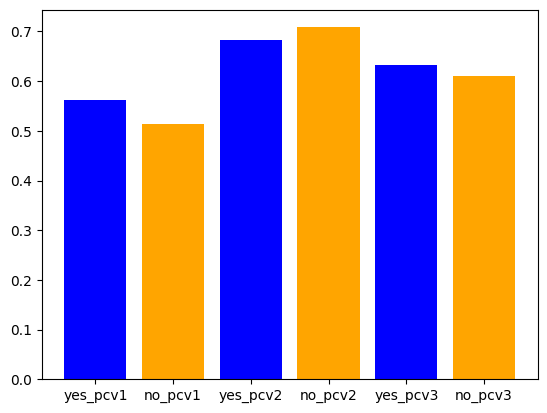

In [81]:
data2=[yes_pcv1_mean,no_pcv1_mean, yes_pcv2_mean, no_pcv2_mean, yes_pcv3_mean, no_pcv3_mean]
plt.xticks(range(len(data2)),['yes_pcv1','no_pcv1', 'yes_pcv2', 'no_pcv2', 'yes_pcv3', 'no_pcv3'])
plt.bar(range(len(data2)), data2, color=['blue', 'orange'])

<BarContainer object of 4 artists>

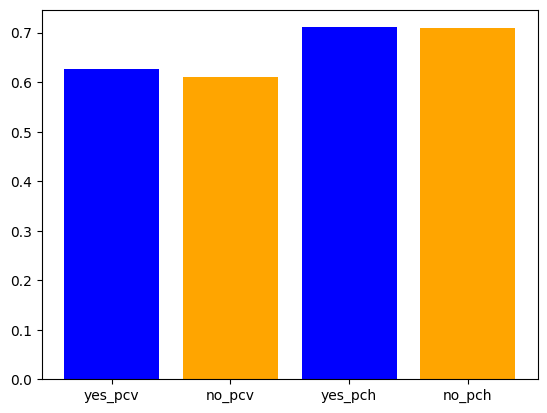

In [82]:
data3=[yes_pcv_total, no_pcv_total, yes_pch_total, no_pch_total]
plt.xticks(range(len(data3)),['yes_pcv','no_pcv', 'yes_pch', 'no_pch'])
plt.bar(range(len(data3)), data3,color=['blue', 'orange'])

T-tests for UEQ Ratings 

In [83]:
stats.ttest_ind(a=df['VC-Trust_1'],b=df['C-Trust_1'],nan_policy="omit", alternative="less" )

Ttest_indResult(statistic=1.30254381071074, pvalue=0.9013366120409196)

In [84]:
stats.ttest_ind(a=df['VC-Stimulation_3'],b=df['C-Stimulation_3'], nan_policy="omit", alternative="less" )

Ttest_indResult(statistic=0.5571783926123054, pvalue=0.7103403986875196)

In [85]:
stats.ttest_ind(a=df['C Time_First Click'],b=df['VC Time_First Click'], nan_policy="omit", alternative="less" )

Ttest_indResult(statistic=1.3113656511773673, pvalue=0.902860926147497)

Box plots for Time First Click

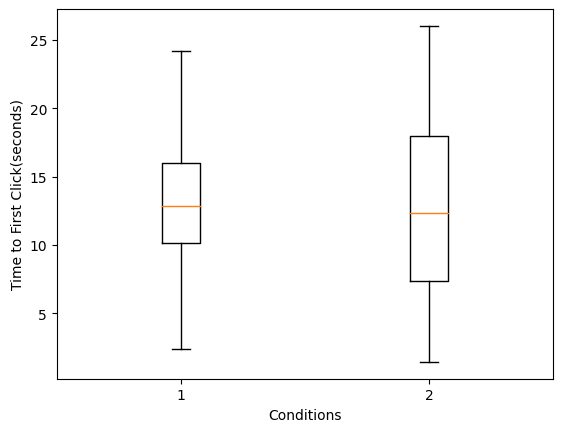

In [86]:
control_data=df['C Time_First Click'].dropna()
visual_data=df['VC Time_First Click'].dropna()

first_click_data= [control_data,visual_data]
plt.boxplot(first_click_data, showfliers=False)
plt.xlabel("Conditions")
plt.ylabel("Time to First Click(seconds)")
plt.show()


In [87]:
print(max(control_data))

90.665


(array([0., 2., 1., 3., 1., 8., 6., 4., 1., 0., 2., 0., 1., 0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28.]),
 <BarContainer object of 14 artists>)

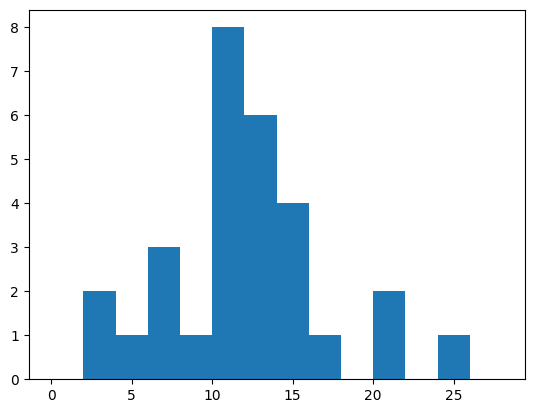

In [88]:
plt.hist(control_data,bins=[x*2 for x in range(15)])

(array([2., 0., 4., 5., 1., 4., 6., 1., 2., 3., 1., 1., 1., 1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28.]),
 <BarContainer object of 14 artists>)

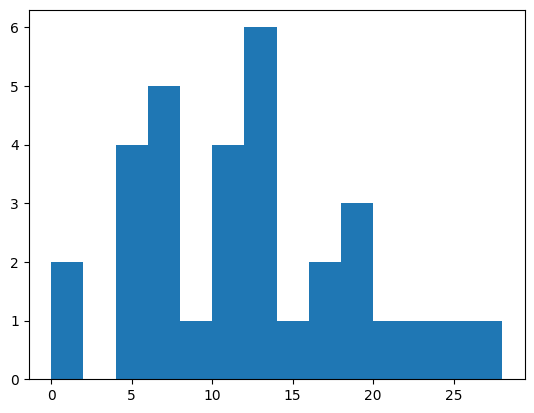

In [89]:
plt.hist(visual_data, bins=[x*2 for x in range(15)])

Fitting 109 distributions:  95%|█████████▌| 104/109 [00:14<00:01,  4.37it/s]/Users/farahdianputri/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  98%|█████████▊| 107/109 [00:18<00:01,  1.52it/s]/Users/farahdianputri/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,0.033084,1212.948368,-225.212938,inf,0.089636,0.924936
t,0.033578,1282.755146,-224.709323,inf,0.120689,0.660745
cauchy,0.033579,1290.927582,-228.234319,inf,0.123752,0.630449
gennorm,0.034117,1244.119623,-224.168242,inf,0.144109,0.439192
levy_stable,0.034257,1222.561196,-220.501932,inf,0.091232,0.915360


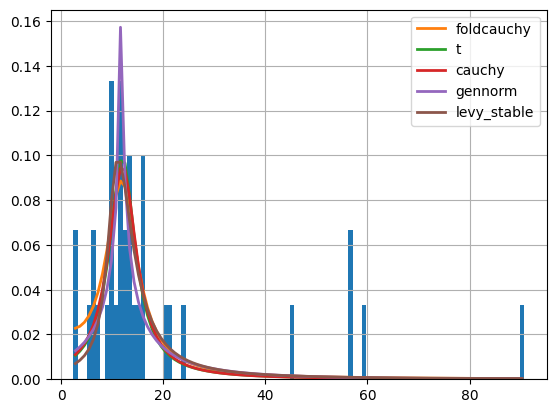

In [90]:
f= Fitter(control_data)
f.fit()
f.summary()

Fitting 109 distributions:  95%|█████████▌| 104/109 [00:25<00:05,  1.12s/it]/Users/farahdianputri/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  99%|█████████▉| 108/109 [00:29<00:00,  1.11it/s]/Users/farahdianputri/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,0.087769,1006.301193,-192.040937,inf,0.112732,0.738626
loglaplace,0.087974,956.250632,-191.961261,inf,0.104695,0.812915
dgamma,0.088175,1047.774823,-191.883679,inf,0.093636,0.899788
foldcauchy,0.089634,963.573841,-191.325837,inf,0.107854,0.784514
gennorm,0.089927,1017.958598,-191.214730,inf,0.102461,0.832191


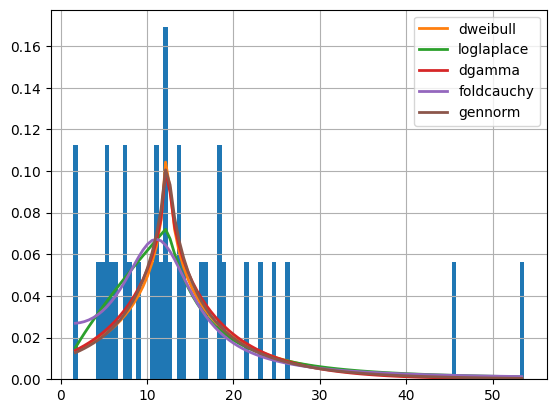

In [91]:
fvc= Fitter(visual_data)
fvc.fit()
fvc.summary()

In [92]:
stats.ttest_ind(control_data,visual_data,alternative="two-sided")

Ttest_indResult(statistic=1.3113656511773675, pvalue=0.19427814770500593)

(array([ 3.,  4.,  5.,  2.,  5., 13.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

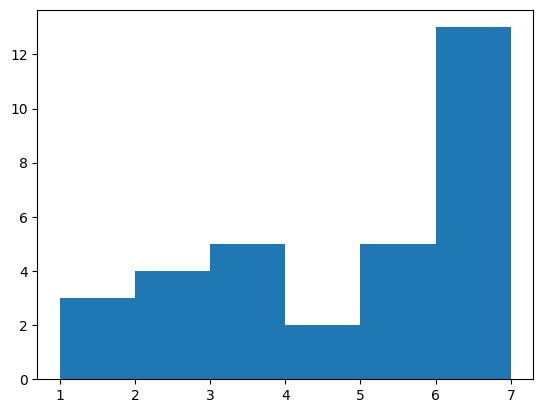

In [93]:
plt.hist(df['C-Trust_1'], bins=[1,2,3,4,5,6,7])

(array([ 0.,  0.,  5.,  9., 10., 11.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

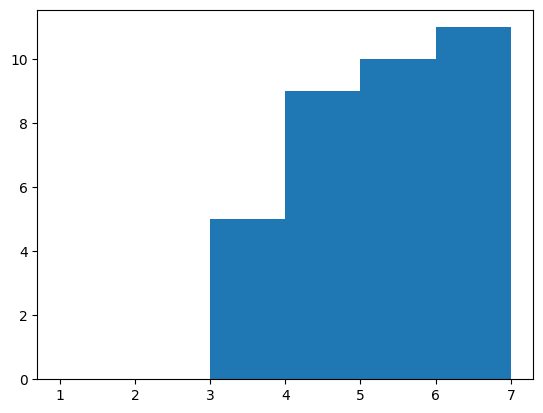

In [94]:
plt.hist(df['VC-Trust_1'], bins=[1,2,3,4,5,6,7])